<a href="https://colab.research.google.com/github/AndreaBur/AI_Implementation/blob/main/ModeloClasifDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Cargar el archivo
ruta = "/content/drive/MyDrive/Colab Notebooks/Datos/DiabetesCsv/Dataset of Diabetes .csv"
df = pd.read_csv(ruta)

# Ver primeras filas y nombres de columnas
print("Columnas disponibles:")
print(df.columns)
print("\nPrimeras filas:")
print(df.head())


Columnas disponibles:
Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

Primeras filas:
    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  



✅ Exactitud por etiqueta:
Diabetes: 1.00
Obesidad: 1.00
Colesterol_Alto: 1.00

📊 Reporte de clasificación completo:
                 precision    recall  f1-score   support

       Diabetes       1.00      1.00      1.00       228
       Obesidad       1.00      1.00      1.00       163
Colesterol_Alto       1.00      1.00      1.00       115

      micro avg       1.00      1.00      1.00       506
      macro avg       1.00      1.00      1.00       506
   weighted avg       1.00      1.00      1.00       506
    samples avg       0.87      0.87      0.87       506



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


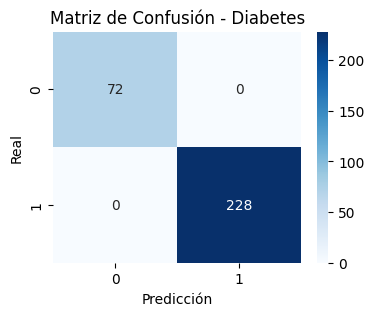

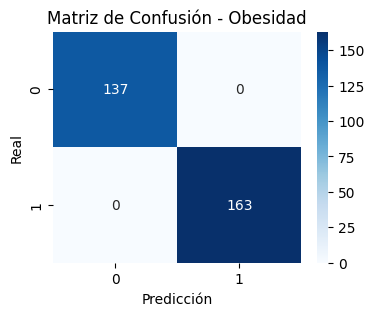

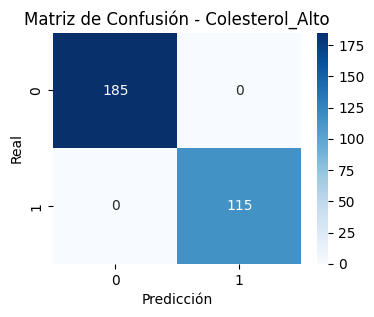

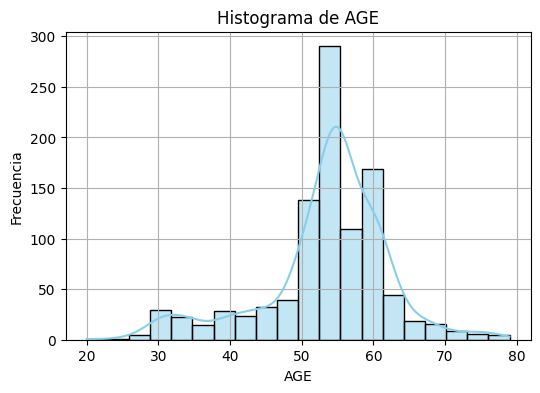

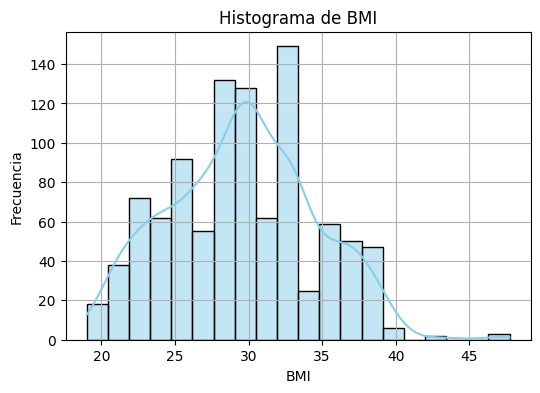

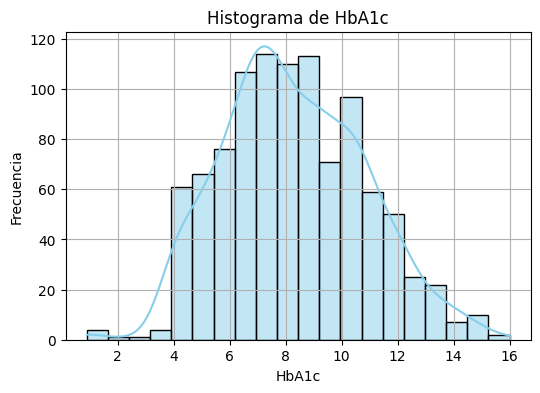

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
#graficos
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

# Cargar el dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos/DiabetesCsv/Dataset of Diabetes .csv')

# --- LIMPIEZA DE DATOS ---
# Eliminar columnas que no aportan al modelo
df = df.drop(columns=['ID', 'No_Pation'])

# Eliminar filas con valores faltantes
df = df.dropna()

# Codificar género (F=0, M=1)
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

# --- CREACIÓN DE ETIQUETAS MULTIETIQUETA ---
# Etiqueta 1: Riesgo de diabetes (HbA1c >= 6.5)
diabetes_risk = (df['HbA1c'] >= 6.5).astype(int)

# Etiqueta 2: Obesidad (BMI >= 30)
obesity_risk = (df['BMI'] >= 30).astype(int)

# Etiqueta 3: Colesterol alto (Chol >= 5.2 mmol/L)
cholesterol_risk = (df['Chol'] >= 5.2).astype(int)

# Combinar en matriz de etiquetas
y = np.column_stack([diabetes_risk, obesity_risk, cholesterol_risk])
label_names = ['Diabetes', 'Obesidad', 'Colesterol_Alto']

# --- SEPARACIÓN DE DATOS ---
X = df.drop(columns=['CLASS'])  # CLASS no se usará directamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- ESCALAR CARACTERÍSTICAS ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- MODELO MULTIETIQUETA CON RANDOM FOREST ---
model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
model.fit(X_train_scaled, y_train)

# --- PREDICCIÓN Y EVALUACIÓN ---
y_pred = model.predict(X_test_scaled)

print("\n✅ Exactitud por etiqueta:")
for i, label in enumerate(label_names):
    acc = accuracy_score(y_test[:, i], y_pred[:, i])
    print(f"{label}: {acc:.2f}")

print("\n📊 Reporte de clasificación completo:")
print(classification_report(y_test, y_pred, target_names=label_names))

# Obtener matrices de confusión individuales para cada etiqueta
conf_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Dibujar cada una
for i, label in enumerate(label_names):
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusión - {label}")
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Lista de columnas que quieres visualizar
columnas_a_visualizar = ['AGE', 'BMI', 'HbA1c']

# Histograma por columna
for columna in columnas_a_visualizar:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[columna], bins=20, kde=True, color='skyblue')
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()


